住宅価格の分析と予測

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X_df = pd.DataFrame(boston.data)
X_df.columns = boston.feature_names
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# 住宅価格
y = boston.target
print(y[0:5])

[24.  21.6 34.7 33.4 36.2]


In [6]:
X = np.array(X_df.loc[:, ["RM"]])

In [7]:
# 「単回帰」を利用 単回帰は説明変数が1つ、目的変数が1つの回帰モデルで式で表すと`y = aX + b`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# 線形回帰による回帰モデルを作成
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([33.48237895, 19.77877036, 23.81725104, 17.98187334, 21.73902166,
       24.29823863, 44.681222  , 24.05320722, 27.84665648, 22.02942926,
       17.53718671, 23.91707865, 21.65734452, 22.31983686, 23.56314439,
       19.09812755, 23.55406915, 37.64791296, 20.41403699, 21.63011881,
       19.05275137, 21.29433502, 32.05756667, 25.25113856, 23.92615389,
       17.42828386, 27.70145268, 26.50352133, 22.0385045 , 15.31375353,
       41.69546887, 24.32546434, 28.11891361, 23.67204724, 20.12362939,
       20.56831602, 22.97325396, 18.81679519, 27.51087269, 20.35051033,
       20.02380178, 16.25757822, 18.52638759, 16.19405156, 11.06654239,
       22.41966447, 18.63529044, 17.50088576, 30.55107725, 15.78566587,
       21.61196833,  7.69055405, 10.82151098, 19.12535327, 20.42311223,
       21.12190551, 17.48273528, 17.49181052, 21.5302912 , 40.98760035,
       25.54154616, 28.6997288 , 27.94648409, 44.87180199, 16.94729627,
       24.11673388, 22.36521305, 12.75453656, 25.52339569, 25.04

In [11]:
y_test

array([43.5, 21.7, 12.5, 21.8, 21.2, 19.2, 50. , 18. , 28.2, 11.7, 15.1,
       23.6, 19.9, 25.2, 15. , 20.9, 17.7, 50. , 16.6, 21.7, 19.1, 22.7,
       15. , 32.5, 24.2, 13.1, 14.1, 16.4, 23.2, 15.6, 50. ,  9.6, 27.5,
       23.9, 23.4, 14.8, 23. , 22.7, 35.1, 19.4,  5.6, 23.1, 18.4, 11.7,
        7.4, 19.9, 19.9, 19.4, 36.2, 12.3, 24.1, 17.9, 16.1, 23.3, 19.4,
       21.9, 21.8, 18.5, 29.6, 50. , 30.8, 41.3, 29.9, 50. , 20.8, 24.8,
       23.4, 17.8, 22.4, 16.5, 10.4, 20.4, 12.7, 14.1, 14.9, 17.4, 22.5,
       19.6, 16.7, 22.9,  8.4, 21.5, 22.2,  8.4, 24.4,  7.2, 17.8, 19.7,
       18.5, 20.6, 18.6, 19.3, 23.1, 11.8, 30.1, 24. , 23.8, 20.6, 21.6,
       22.5, 14.9, 18.9])

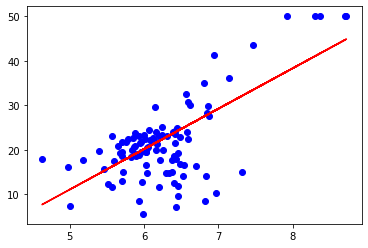

In [12]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_pred, color = "red")